# <center><h1 style = "color:navy;">Customer Segmentation using Clustering</h1></center>

## <h1 style="color:indigo">1.  Exploratory Data Analysis(EDA)</h1>

In [245]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import StandardScaler     #for scaling the features before modelling

### <h2 style="color:purple">a. Data Exploration</h2>

In [246]:
airlines = pd.ExcelFile("EastWestAirlines.xlsx")

In [247]:
airlines.sheet_names

['Description', 'data']

In [248]:
# Read the entire sheet without specifying a header
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="Description", header=None)

# Extract the rows above the 9th row (row index 0 to 8)
description_rows = df.iloc[:9]  # Adjust as necessary if there are fewer/more rows

# Merge the description rows into a single string, ignoring null values
description_text = "\n".join(
    description_rows.dropna(how="all").astype(str).apply(
        lambda row: " ".join(cell for cell in row if cell and cell != 'nan'), axis=1
    )
)

print("Description:")
print(description_text)

Description:
East-West Airlines is trying to learn more about its customers.  Key issues are their
flying patterns, earning and use of frequent flyer rewards, and use of the airline credit
card.  The task is to identify customer segments via clustering.
Source: Based upon real business data; company names have been changed.
(c) 2016 Galit Shmueli and Peter Bruce


In [249]:
desc = pd.read_excel("EastWestAirlines.xlsx",sheet_name="Description", header=9)
desc.fillna("", inplace=True)
pd.options.display.max_colwidth = None  
desc

,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
0,ID#,NUMBER,,Telcom,Unique ID
1,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
2,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topflight status
3,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit card in the past 12 months:
4,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit card in the past 12 months:
5,cc3_miles,CHAR,1.0,Raw,Number of miles earned with Small Business credit card in the past 12 months:
6,note: miles bins:,,,,"1 = under 5,000"
7,,,,,"2 = 5,000 - 10,000"
8,,,,,"3 = 10,001 - 25,000"
9,,,,,"4 = 25,001 - 50,000"


In [250]:
airlines  = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [251]:
airlines.shape

(3999, 12)

In [252]:
airlines.rename(columns={"Qual_miles":"Qualified_miles","Flight_miles_12mo":"Miles_12", "Flight_trans_12":"Trans_12","Award?":"Award"},inplace=True)

Column Description:

1. <b>ID#:</b>A unique number assigned to each customer for identification.

2. <b>Balance:</b> Total number of miles the customer has that are eligible for award travel (redeemable miles).

3. <b>Qualified_miles:</b> The miles that qualify the customer for elite "Topflight" status (e.g., earned by flying with the airline, not bonus miles).

4. <b>cc1_miles:</b> Miles earned in the last 12 months using the airline’s frequent flyer credit card.

5. <b>cc2_miles: </b>Miles earned using a rewards credit card (not tied to the airline) in the last 12 months

6. <b>cc3_miles:</b> Miles earned using a small business credit card in the last 12 months.

7. <b>Bonus_miles: </b>Miles earned from bonus activities (like shopping or dining programs) in the last 12 months.

8. <b>Bonus_trans:</b> The number of bonus transactions (not flights) made in the last 12 months.

9. <b>Miles_12:</b> Total miles flown with the airline in the past 12 months.

10. <b>Trans_12:</b> The number of flights taken in the past 12 months.

11. <b>Days_since_enroll: </b>The number of days since the customer first joined the airline's program.

12. <b>Award: </b>Indicates whether the customer redeemed an award recently

In [253]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qualified_miles    3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Miles_12           3999 non-null   int64
 9   Trans_12           3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [254]:
airlines.isna().sum()

ID#                  0
Balance              0
Qualified_miles      0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Miles_12             0
Trans_12             0
Days_since_enroll    0
Award                0
dtype: int64

There are no null values in our dataset, hence imputation is not needed

In [255]:
airlines.nunique()

ID#                  3999
Balance              3904
Qualified_miles       164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Miles_12              343
Trans_12               35
Days_since_enroll    2820
Award                   2
dtype: int64

In [256]:
airlines["cc1_miles"].unique()

array([1, 4, 3, 2, 5], dtype=int64)

In [257]:
airlines["cc2_miles"].unique()

array([1, 2, 3], dtype=int64)

In [258]:
airlines["cc3_miles"].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [259]:
airlines["Trans_12"].unique()

array([ 0,  4,  1, 12,  3,  2,  9, 11,  5,  7, 29,  8, 16, 10, 14,  6, 23,
       17, 18, 13, 15, 25, 28, 20, 26, 27, 19, 36, 45, 24, 31, 21, 53, 22,
       46], dtype=int64)

In [260]:
airlines["Trans_12"].unique()

array([ 0,  4,  1, 12,  3,  2,  9, 11,  5,  7, 29,  8, 16, 10, 14,  6, 23,
       17, 18, 13, 15, 25, 28, 20, 26, 27, 19, 36, 45, 24, 31, 21, 53, 22,
       46], dtype=int64)

Changing necessary datatypes: as cc1, cc2, cc3 are all bins, we will also make them into category

In [261]:
airlines["Award"]= airlines["Award"].astype("category")
airlines["cc1_miles"]= airlines["cc1_miles"].astype("int")
airlines["cc2_miles"] =airlines["cc2_miles"].astype("int")
airlines["cc3_miles"] = airlines["cc3_miles"].astype("int")

In [262]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID#                3999 non-null   int64   
 1   Balance            3999 non-null   int64   
 2   Qualified_miles    3999 non-null   int64   
 3   cc1_miles          3999 non-null   int32   
 4   cc2_miles          3999 non-null   int32   
 5   cc3_miles          3999 non-null   int32   
 6   Bonus_miles        3999 non-null   int64   
 7   Bonus_trans        3999 non-null   int64   
 8   Miles_12           3999 non-null   int64   
 9   Trans_12           3999 non-null   int64   
 10  Days_since_enroll  3999 non-null   int64   
 11  Award              3999 non-null   category
dtypes: category(1), int32(3), int64(8)
memory usage: 301.0 KB


In [263]:
airlines.set_index('ID#', inplace=True)

In [264]:
airlines.describe().apply( lambda x: x.apply('{0:.5f}'.format))

,Balance,Qualified_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Miles_12,Trans_12,Days_since_enroll
count,3999.00000,3999.00000,3999.00000,3999.00000,3999.00000,3999.00000,3999.00000,3999.00000,3999.00000,3999.00000
mean,73601.32758,144.11453,2.05951,1.01450,1.01225,17144.84621,11.60190,460.05576,1.37359,4118.55939
std,100775.66496,773.66380,1.37692,0.14765,0.19524,24150.96783,9.60381,1400.20917,3.79317,2065.13454
min,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,2.00000
25%,18527.50000,0.00000,1.00000,1.00000,1.00000,1250.00000,3.00000,0.00000,0.00000,2330.00000
50%,43097.00000,0.00000,1.00000,1.00000,1.00000,7171.00000,12.00000,0.00000,0.00000,4096.00000
75%,92404.00000,0.00000,3.00000,1.00000,1.00000,23800.50000,17.00000,311.00000,1.00000,5790.50000
max,1704838.00000,11148.00000,5.00000,3.00000,5.00000,263685.00000,86.00000,30817.00000,53.00000,8296.00000


Range of values in each column:
 1. Balance : 0 - 17,04,838
 2. Qualified_miles:  0 - 11,148
 3. Bonus_miles : 0 - 2,63,685
 4. Bonus_trans: 0 - 86
 5. Miles_12: 0 - 30,817
 6. Trans_12 :0 - 53
 7. Days_since_enroll: 2- 8,396
 
 
 50% of data have customer that hasn't flown from the airlines as 50th percentile of Miles_12 and Trans_12 is at 0

### <h2 style="color:purple">b. Feature Analysis</h2>

#### <h3 style="color:midnightblue">Univariate Analysis</h3>

1. Balance

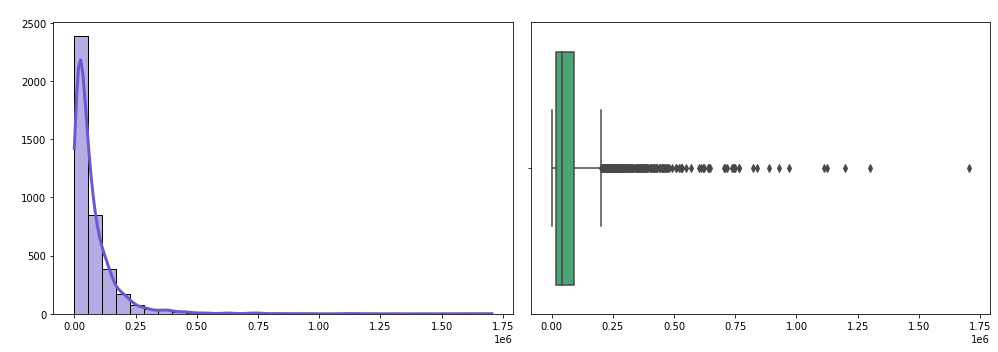

In [265]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    airlines['Balance'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=airlines['Balance'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


2. Qualified miles

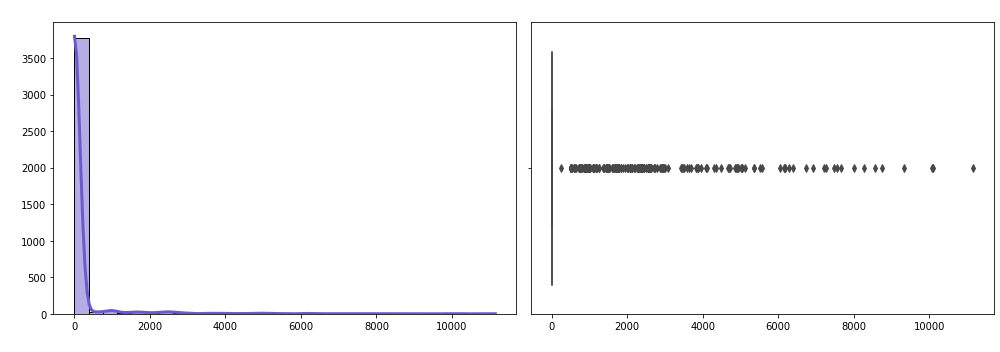

In [266]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    airlines['Qualified_miles'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=airlines['Qualified_miles'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


3.  cc1_miles

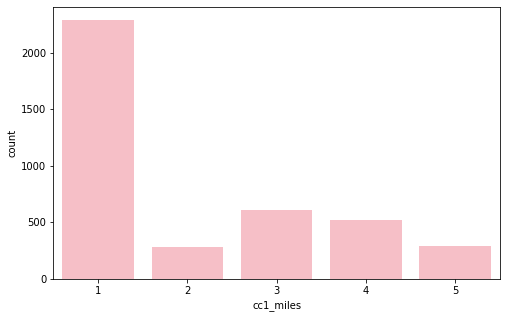

In [267]:
# Define dark pastel color for barplot
count_color = "#FFB6C1"   # Light Pink

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="cc1_miles", data=airlines, color=count_color, ax=ax)
plt.show()

4. cc2_miles

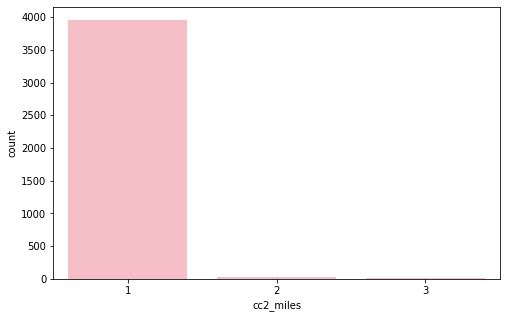

In [268]:
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="cc2_miles", data=airlines, color=count_color, ax=ax)
plt.show()

5. cc3_miles

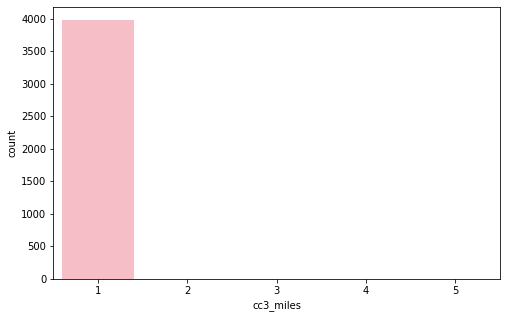

In [269]:
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="cc3_miles", data=airlines, color=count_color, ax=ax)
plt.show()

6. Bonus_miles

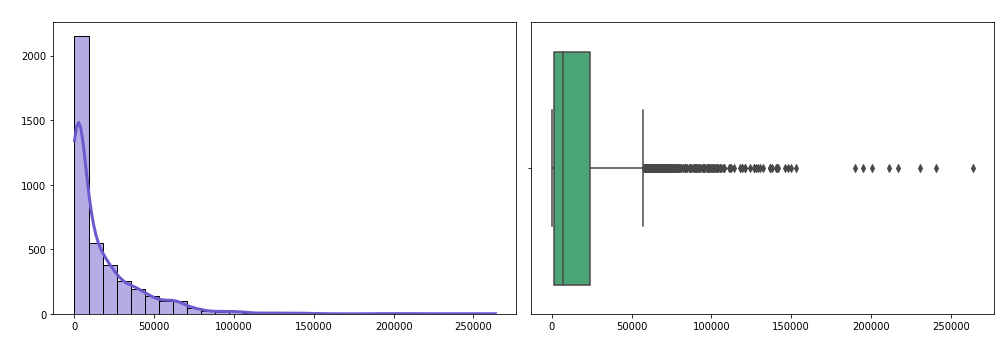

In [270]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    airlines['Bonus_miles'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=airlines['Bonus_miles'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


7.Bonus_trans

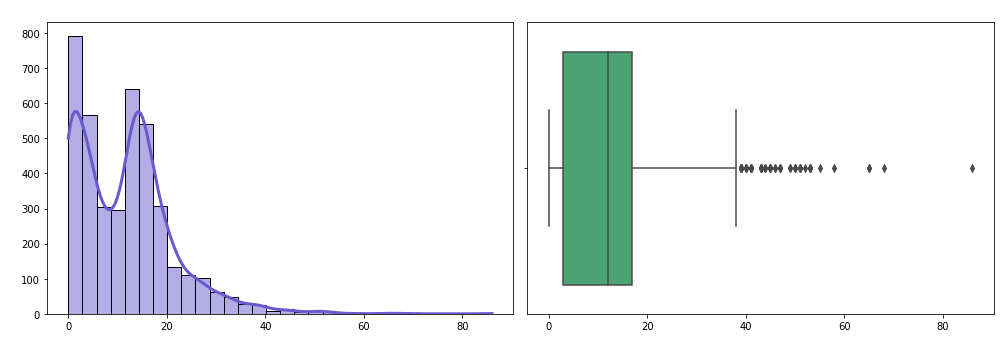

In [271]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    airlines['Bonus_trans'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=airlines['Bonus_trans'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


8.MIles_12

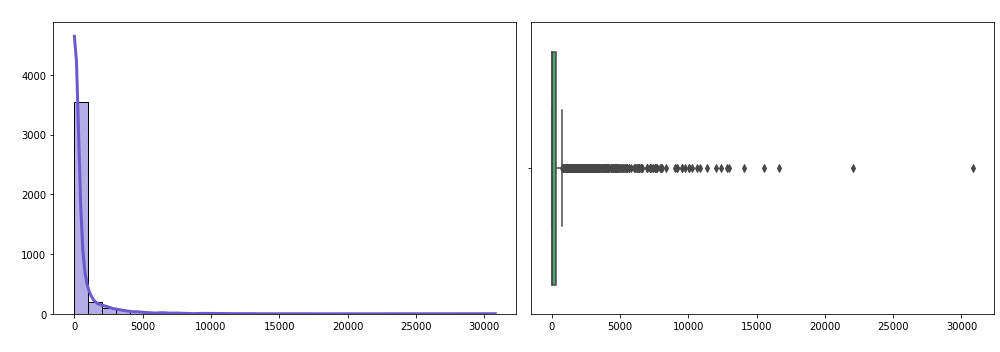

In [272]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    airlines['Miles_12'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=airlines['Miles_12'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


9. Trans_12

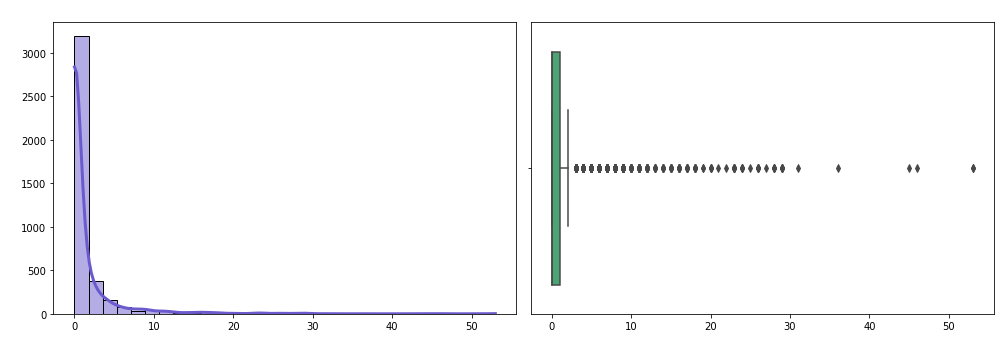

In [273]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    airlines['Trans_12'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=airlines['Trans_12'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


10. Days_since_enroll

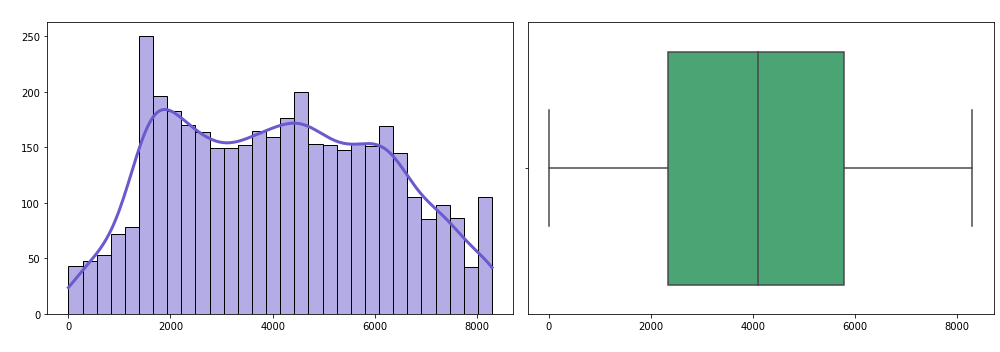

In [274]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    airlines['Days_since_enroll'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=airlines['Days_since_enroll'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


11. Award

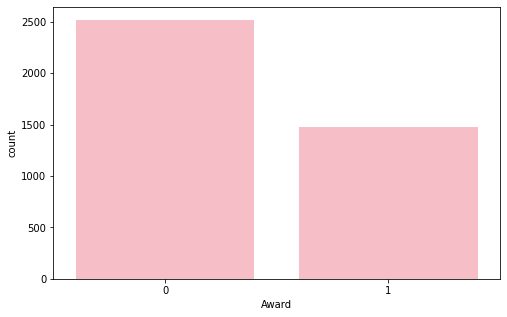

In [275]:
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="Award", data=airlines, color=count_color, ax=ax)
plt.show()

Most of our numerical columns are positively skewed, and has many outliers. K-means is sensitive to such outliers and distort the clustering, so we have to handle the outliers for Kmeans by log transforming the ones that is skewed. This is reduce the skewness to some level


#### <h3 style="color:midnightblue">Multivariate Analysis</h3>

1. Pairplot

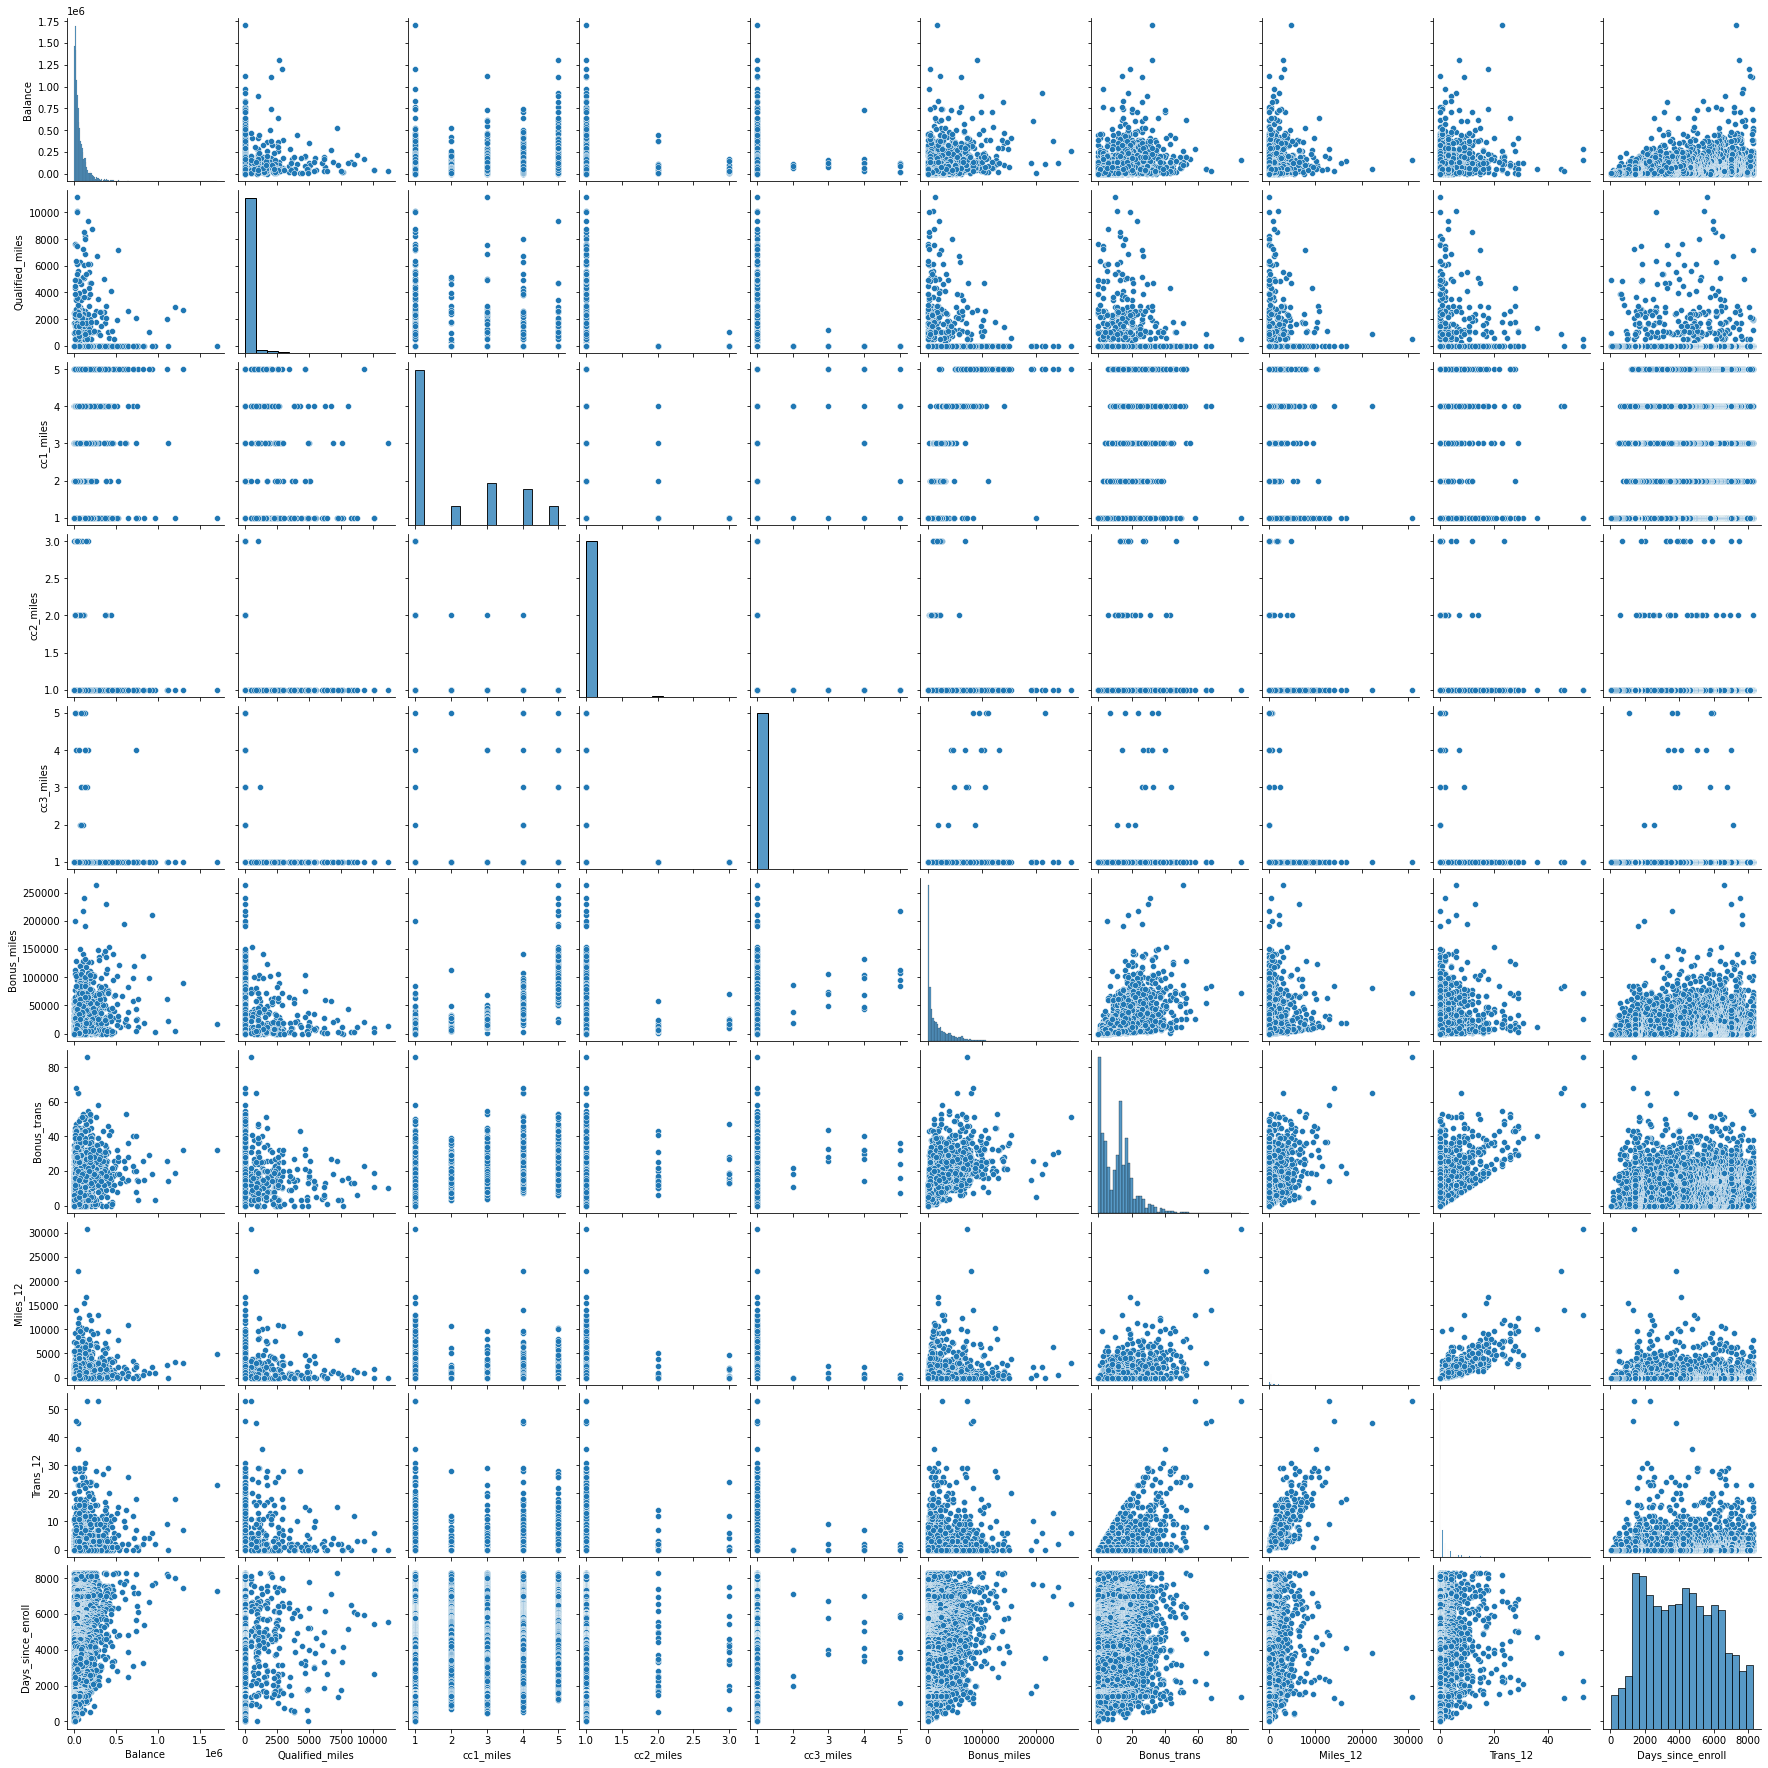

In [276]:
sns.pairplot(airlines.select_dtypes(include=np.number), palette='Set2')

2. Correlation heatmap

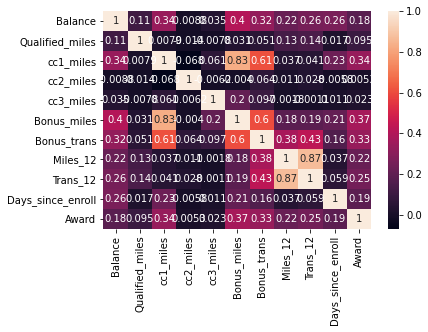

In [277]:
sns.heatmap(airlines.corr(), annot=True)
plt.show()

Features with high correlation are:
Bonus_trans - Bonus_Miles
Miled_12 - Trans_12

It is intuitive because to earn the miles, customer would have to have a transaction

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = airlines.columns
vif_data["VIF"] = [variance_inflation_factor(airlines.values, i) for i in range(airlines.shape[1])]
vif_data

,Feature,VIF
0,Balance,2.008050
1,Qualified_miles,1.068485
2,cc1_miles,11.574026
3,cc2_miles,21.128949
4,cc3_miles,19.138455
5,Bonus_miles,5.242434
6,Bonus_trans,5.448871
7,Miles_12,4.559940
8,Trans_12,5.182670
9,Days_since_enroll,5.410580


For k-means we will try the algorithm with the features above and below separately to check if there is any difference in the clusters formed.

In [279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = airlines[['Balance','Qualified_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_trans','Miles_12','Days_since_enroll','Award']].columns
vif_data["VIF"] = [variance_inflation_factor(airlines[['Balance','Qualified_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_trans','Miles_12','Days_since_enroll','Award']].values, i) for i in range(airlines[['Balance','Qualified_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_trans','Miles_12','Days_since_enroll','Award']].shape[1])]
vif_data


,Feature,VIF
0,Balance,1.916818
1,Qualified_miles,1.064722
2,cc1_miles,6.036819
3,cc2_miles,19.416201
4,cc3_miles,18.927689
5,Bonus_trans,5.002230
6,Miles_12,1.471174
7,Days_since_enroll,5.370295
8,Award,1.929569


#### <h3 style="color:midnightblue">Pattern Recognition</h3>

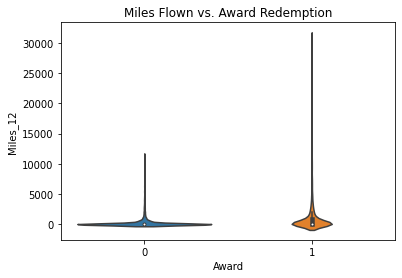

In [280]:
sns.violinplot(x=airlines["Award"], y=airlines["Miles_12"])
plt.title("Miles Flown vs. Award Redemption")
plt.show()

- For customers who redeemed awards (Award = 1), the distribution of Miles_12 appears wider and has a longer tail, indicating a few customers flew significantly more miles.
- For customers who did not redeem awards (Award = 0), the distribution is narrower, suggesting most flew fewer miles.

- The majority of award redeemers (Award = 1) have flown more miles than non-redeemers. This suggests customers who fly more miles are more likely to redeem awards.

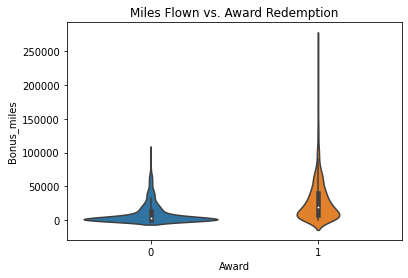

In [281]:
sns.violinplot(x=airlines["Award"], y=airlines["Bonus_miles"])
plt.title("Miles Flown vs. Award Redemption")
plt.show()

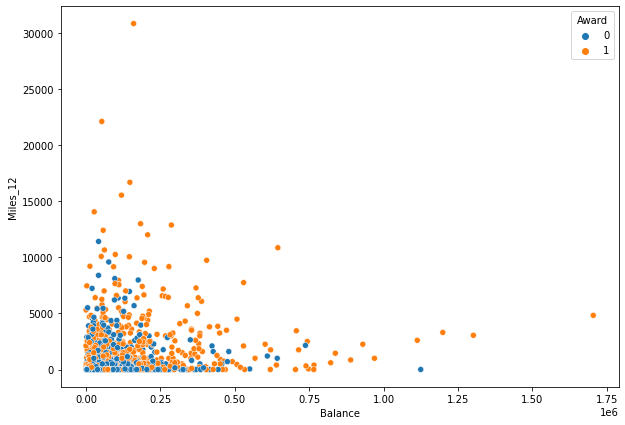

In [282]:
fig, ax = plt.subplots(figsize=(10, 7)) 
sns.scatterplot(x=airlines['Balance'], y =airlines['Miles_12'], hue=airlines['Award'])
plt.show()

Award redemeers tends to have very scattered pattern:
- There are customers who have flown less past year but still have huge balance. These customers might have not been much aware of the balances they have
- There are customers with less balance but have flew a lot of miles, suggesting they are heavy users of redeeming the awards frequently


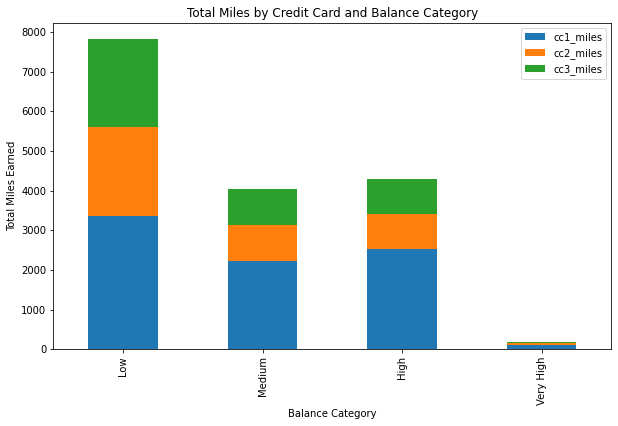

In [283]:
# Example: Categorize balance into 'High' or 'Low' and compare usage of cc1, cc2, cc3 miles
airlines['balance_category'] = pd.cut(airlines['Balance'], bins=[0, 50000, 100000, 500000, 2000000], labels=['Low', 'Medium', 'High','Very High'])

# Create a summary for each balance category
usage_by_balance = airlines.groupby('balance_category')[['cc1_miles', 'cc2_miles', 'cc3_miles']].sum()

usage_by_balance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Miles by Credit Card and Balance Category')
plt.xlabel('Balance Category')
plt.ylabel('Total Miles Earned')
plt.show()


## <h1 style="color:indigo">2.  Data Preprocessing</h1>


#### Log transfomation of skewed features

We will transform and plot to check the distribution of log transformed columns

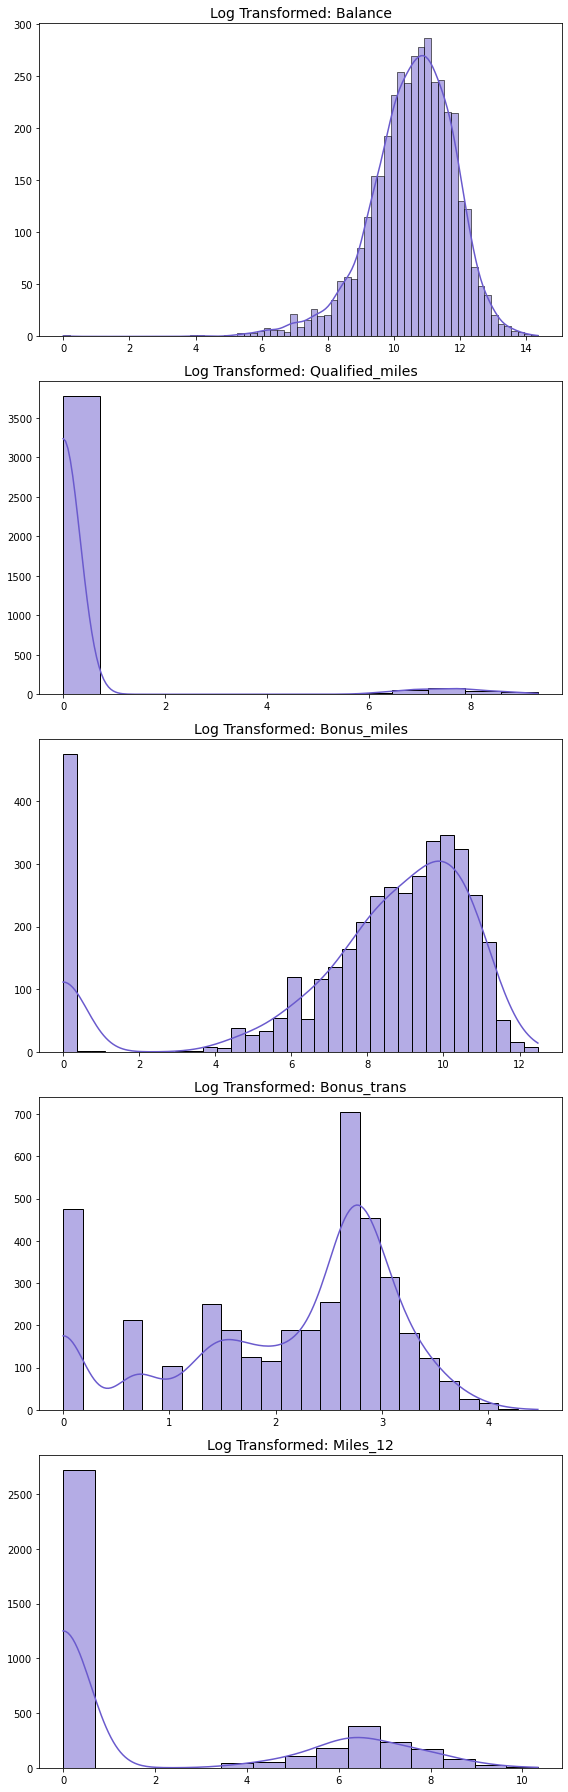

In [284]:
# Apply log transformation to all numerical columns
df_log = np.log1p(airlines[["Balance","Qualified_miles","Bonus_miles","Bonus_trans","Miles_12"]])  # log1p(x) = log(x + 1) to avoid log(0) issues

# Plot histograms in separate rows
fig, axes = plt.subplots(nrows=len(df_log.columns), ncols=1, figsize=(8, 5 * len(df_log.columns)))

for i, col in enumerate(df_log.columns):
    sns.histplot(df_log[col], kde=True, color="#6A5ACD", ax=axes[i])
    axes[i].set_title(f"Log Transformed: {col}", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


plt.tight_layout()
plt.show()

There is some difference in the distribution from the orginal although there are some features that didnt change much.

In [285]:
airlines.head()

,Balance,Qualified_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Miles_12,Trans_12,Days_since_enroll,Award,balance_category
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,Low
2,19244,0,1,1,1,215,2,0,0,6968,0,Low
3,41354,0,1,1,1,4123,4,0,0,7034,0,Low
4,14776,0,1,1,1,500,1,0,0,6952,0,Low
5,97752,0,4,1,1,43300,26,2077,4,6935,1,Medium


In [286]:
df_log.head()

,Balance,Qualified_miles,Bonus_miles,Bonus_trans,Miles_12
ID#,,,,,
1,10.245089,0.0,5.164786,0.693147,0.000000
2,9.865007,0.0,5.375278,1.098612,0.000000
3,10.629949,0.0,8.324579,1.609438,0.000000
4,9.600827,0.0,6.216606,0.693147,0.000000
5,11.490199,0.0,10.675931,3.295837,7.639161


In [287]:
airlines_processed = df_log.copy()
airlines_processed["Days_since_enroll"] = airlines["Days_since_enroll"]
airlines_processed["cc1_miles"] = airlines["cc1_miles"]
airlines_processed["cc2_miles"] = airlines["cc2_miles"]
airlines_processed["cc3_miles"] = airlines["cc3_miles"]

In [288]:
airlines_processed.head()

,Balance,Qualified_miles,Bonus_miles,Bonus_trans,Miles_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles
ID#,,,,,,,,,
1,10.245089,0.0,5.164786,0.693147,0.000000,7000,1,1,1
2,9.865007,0.0,5.375278,1.098612,0.000000,6968,1,1,1
3,10.629949,0.0,8.324579,1.609438,0.000000,7034,1,1,1
4,9.600827,0.0,6.216606,0.693147,0.000000,6952,1,1,1
5,11.490199,0.0,10.675931,3.295837,7.639161,6935,4,1,1


In [289]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
airlines_processed  = pd.DataFrame(scaler.fit_transform(airlines_processed), columns = airlines_processed.columns, index = airlines_processed.index)
airlines_processed["Award"] = airlines['Award']
airlines_processed

,Balance,Qualified_miles,Bonus_miles,Bonus_trans,Miles_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award
ID#,,,,,,,,,,
1,-0.265200,0.0,-1.260489,-1.244485,0.000000,0.839185,0.0,0.0,0.0,0
2,-0.501736,0.0,-1.189034,-0.974908,0.000000,0.829938,0.0,0.0,0.0,0
3,-0.025692,0.0,-0.187847,-0.635281,0.000000,0.849010,0.0,0.0,0.0,0
4,-0.666142,0.0,-0.903432,-1.244485,0.000000,0.825314,0.0,0.0,0.0,0
5,0.509666,0.0,0.610356,0.485937,1.330198,0.820402,1.5,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
4017,-0.527080,0.0,0.058706,-0.635281,0.923458,-0.778211,0.0,0.0,0.0,1
4018,0.249814,0.0,-0.674976,-0.514063,0.000000,-0.780523,0.0,0.0,0.0,1
4019,0.333033,0.0,0.429917,-0.244485,0.000000,-0.778500,1.0,0.0,0.0,1


In [290]:

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load pre-processed dataset
data = airlines_processed.copy()

airlines_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Balance            3999 non-null   float64 
 1   Qualified_miles    3999 non-null   float64 
 2   Bonus_miles        3999 non-null   float64 
 3   Bonus_trans        3999 non-null   float64 
 4   Miles_12           3999 non-null   float64 
 5   Days_since_enroll  3999 non-null   float64 
 6   cc1_miles          3999 non-null   float64 
 7   cc2_miles          3999 non-null   float64 
 8   cc3_miles          3999 non-null   float64 
 9   Award              3999 non-null   category
dtypes: category(1), float64(9)
memory usage: 316.4 KB


## <h1 style="color:indigo">3.  Modeling and Evaluation</h1>

We will be evaluation our models using internal metrics: Silhouette scores mostly, and Davies-Bouldin for Hierarichical clustering and DBSCAN. WCSS for Kmeans.
We won't be able to evaluate using external metrics because we dont know the ground truth forour usecase.
 

In [291]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Function to calculate silhouette score
def calculate_silhouette(X, method='ward', num_clusters=4):
    """Calculate Silhouette Score for hierarchical clustering."""
    Z = linkage(X, method=method)
    labels = fcluster(Z, num_clusters, criterion='maxclust')
    ss = silhouette_score(X, labels)
    dbs= davies_bouldin_score(X, labels)
    return ss,dbs

### <h2 style="color:purple">a. K-Means Clustering</h2>

In [292]:
# Determine optimal K using Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(airlines_processed)
    wcss.append(kmeans.inertia_)
    

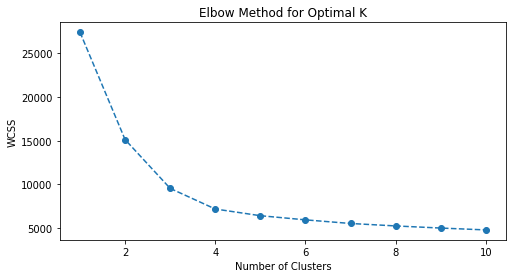

In [293]:
### 1️⃣ K-MEANS CLUSTERING ###


# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [294]:
# Apply K-Means with optimal K (Assume K=3 from elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(airlines_processed)
silhouette_score(airlines_processed, data['KMeans_Cluster'] )

0.4061693311590065

### <h2 style="color:purple">b. Hierachical Clustering</h2>

We will first visualize the dendogram using "ward" linkage matrix method, determine the optimal number of clusters. Then we will see how the evaluation scores changes with each method

In [295]:
# Create a linkage matrix for hierarchical clustering
linkage_matrix = linkage(airlines_processed, method='ward')
linkage_matrix

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.77000000e+03, 3.24600000e+03, 3.87709723e-03, 2.00000000e+00],
       [3.82700000e+03, 3.84500000e+03, 5.63965793e-03, 2.00000000e+00],
       ...,
       [7.99200000e+03, 7.99300000e+03, 7.09985014e+01, 3.31000000e+03],
       [7.98600000e+03, 7.99400000e+03, 1.01903703e+02, 3.77300000e+03],
       [7.98800000e+03, 7.99500000e+03, 1.56759698e+02, 3.99900000e+03]])

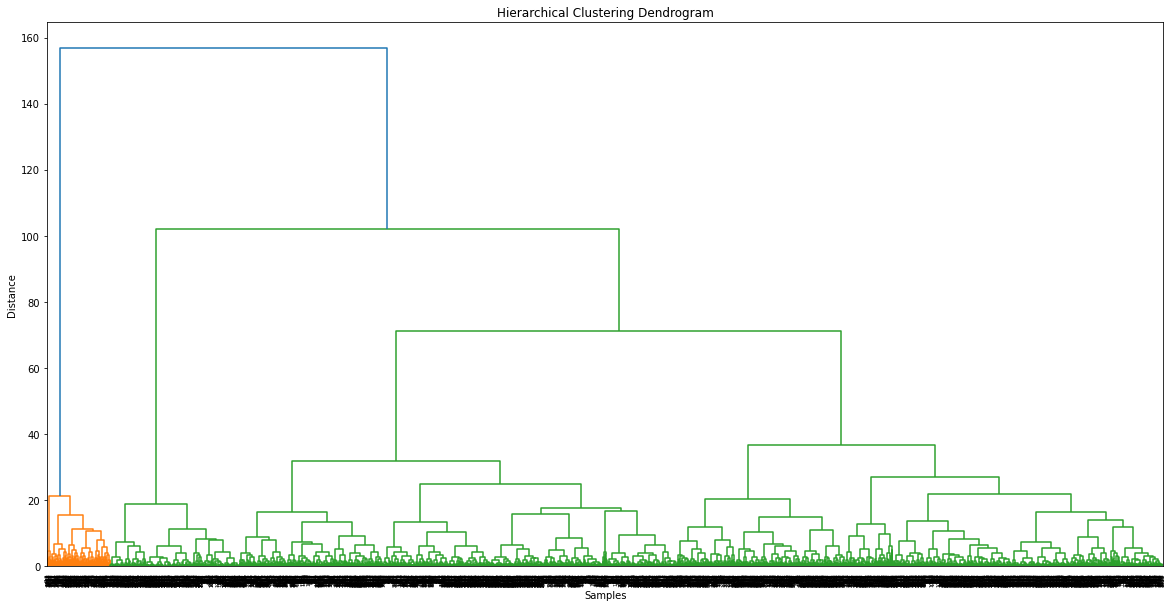

In [296]:

# Plot Dendrogram
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

Optimal cluster can be 3 or 4, so we will check the scores for both

In [297]:

# Define linkage methods
methods = ['single', 'complete', 'average', 'ward']

# Store results
results_s = []
results_db = []

# Perform clustering and calculate silhouette scores
for method in methods:
    ss, dbs = calculate_silhouette(airlines_processed, method=method, num_clusters=4)
    results_s.append({'Linkage Method': method, 'Silhouette Score': ss})
    results_db.append({'Linkage Method': method, 'Davies-Bouldin': dbs})

# Convert to DataFrame
df_results = pd.DataFrame(results_s)

# Display results
print(df_results)

df_results = pd.DataFrame(results_db)

# Display results
print(df_results)


  Linkage Method  Silhouette Score
0         single          0.603808
1       complete          0.307494
2        average          0.621572
3           ward          0.313789
  Linkage Method  Davies-Bouldin
0         single        0.544075
1       complete        0.896053
2        average        0.563007
3           ward        1.023995


In [298]:

# Define linkage methods
methods = ['single', 'complete', 'average', 'ward']

# Store results
results_s = []
results_db = []

# Perform clustering and calculate silhouette scores
for method in methods:
    ss, dbs = calculate_silhouette(airlines_processed, method=method, num_clusters=3)
    results_s.append({'Linkage Method': method, 'Silhouette Score': ss})
    results_db.append({'Linkage Method': method, 'Davies-Bouldin': dbs})

# Convert to DataFrame
df_results = pd.DataFrame(results_s)

# Display results
print(df_results)

df_results = pd.DataFrame(results_db)

# Display results
print(df_results)


  Linkage Method  Silhouette Score
0         single          0.634404
1       complete          0.160259
2        average          0.634404
3           ward          0.475104
  Linkage Method  Davies-Bouldin
0         single        0.409298
1       complete        1.166787
2        average        0.409298
3           ward        0.601781


The scores are much better for cluster n=3 than n=4. 
When Linkage method is "single" or "average", the silhouette scores are really good.

As Ward and complete method doesn't give that good score, it means that the clusters are not that highly compact.
As the single method has good score too, it may be slightly elongated cluster and well separated as"average" method gives good score too.

We will use Average method with n=3, for later analysis

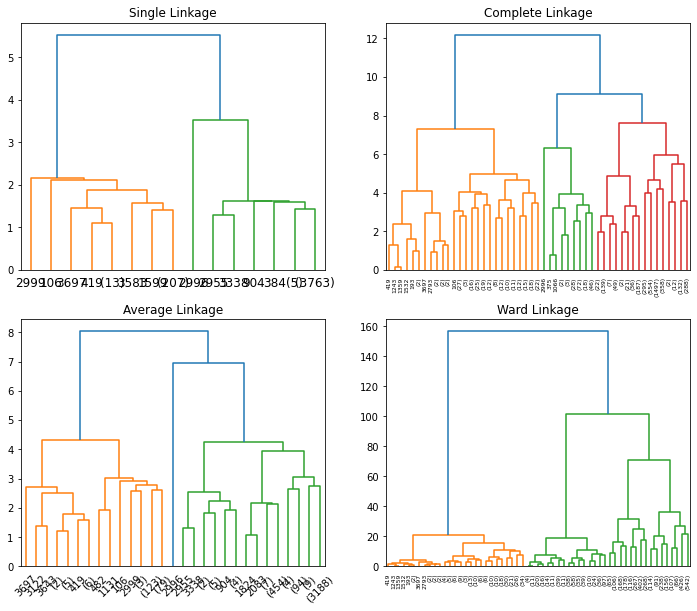

In [299]:
# Plot dendrograms for each method
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, method in zip(axes.flatten(), methods):
    Z = linkage(airlines_processed, method=method)
    dendrogram(Z, ax=ax, truncate_mode='level', p=5)
    ax.set_title(f'{method.capitalize()} Linkage')

plt.show()

In [300]:
# Apply hierarchical clustering with an optimal number of clusters
linkage_matrix = linkage(airlines_processed, method="average")
data['Hierarchical_Cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')
silhouette_score(airlines_processed, data['Hierarchical_Cluster'])

0.6344035095413455

### <h2 style="color:purple">c. DBSCAN</h2>

Because we have a lot of outliers,we wont be checking dunnindex as it is senstive to outliers for DBSCAN

In [301]:

from sklearn.cluster import DBSCAN

from scipy.spatial.distance import pdist, squareform


# Define parameter ranges
eps_values = [1,2,3]
min_samples_values = [3, 5, 7, 10]

# Store results
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(airlines_processed)

        # Skip if all points are noise
        if len(set(labels) - {-1}) < 2:
            continue

        silhouette = silhouette_score(airlines_processed, labels) if len(set(labels)) > 1 else np.nan
        dbi = davies_bouldin_score(airlines_processed, labels)

        results.append({"eps": eps, "min_samples": min_samples, 
                        "Silhouette Score": silhouette, 
                        "Davies-Bouldin Index": dbi, })

# Convert results to DataFrame
df_results = pd.DataFrame(results)
df_results


,eps,min_samples,Silhouette Score,Davies-Bouldin Index
0,1,3,0.044265,1.479789
1,1,5,0.050888,1.599792
2,1,7,0.040029,1.789257
3,1,10,0.037042,1.833424
4,2,3,0.658308,1.543444
5,2,5,0.658308,1.543444
6,2,7,0.629902,1.568243
7,2,10,0.435644,1.576284
8,3,3,0.634404,0.409298
9,3,5,0.634404,0.409298


- For first iteration, eps= 0.2, 0.3, 0.4, 0.5, 0.6, Silhouette scores was on negative values, which indicated bad clustering.
- For second iteration we kept eps = 0.6,0.7,0.8,0.9,1. For eps = 1, min_samples = 10 it gave silhouette =  0.096 , Davies-Bouldin=  1.802
- For third iteration, we kept  eps=1,2,3 above table is the result

In [302]:




### 3️⃣ DBSCAN CLUSTERING ###
# Optimal eps and min_samples
eps_value = 3  # Change this based on data structure
min_samples_value = 3

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data['DBSCAN_Cluster'] = dbscan.fit_predict(airlines_processed)

# Display the final dataset with clusters
silhouette_score(airlines_processed, data['DBSCAN_Cluster'] )


0.6344035095413455

## <h1 style="color:indigo">4.  Visualization</h1>

In [303]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tsne(data, labels, title="TSNE Cluster Visualization"):
    """
    Plots a 2D TSNE visualization of clusters.
    
    Parameters:
    - data: Scaled feature dataset (numpy array or DataFrame)
    - labels: Cluster labels (1D array or list)
    - title: Plot title (string)
    
    Returns:
    - TSNE Scatter plot
    """
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette="viridis", alpha=0.7)
    plt.title(title)
    plt.xlabel("TSNE Component 1")
    plt.ylabel("TSNE Component 2")
    plt.legend(title="Clusters")
    plt.show()


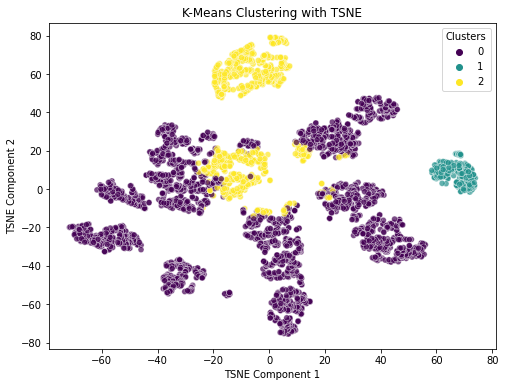

In [170]:
plot_tsne(airlines_processed, data['KMeans_Cluster'], title="K-Means Clustering with TSNE")



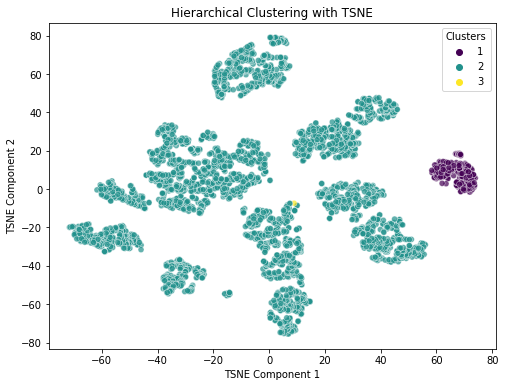

In [171]:
plot_tsne(airlines_processed, data['Hierarchical_Cluster'], title="Hierarchical Clustering with TSNE")


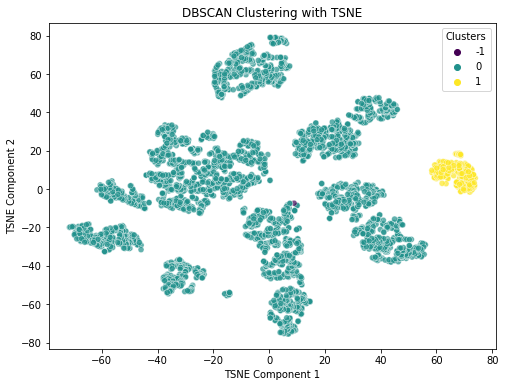

In [187]:
plot_tsne(airlines_processed, data['DBSCAN_Cluster'], title="DBSCAN Clustering with TSNE")

Hierarchial clustering and DBSCAN Clustering gave the same kind of clustering results. Mostly because they are not affected by outliers much

## <h1 style="color:indigo">5.  Final analysis and interpretations</h1>

In [173]:
airlines.columns

Index(['Balance', 'Qualified_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Miles_12', 'Trans_12',
       'Days_since_enroll', 'Award', 'balance_category'],
      dtype='object')

In [174]:
airlines.drop("balance_category", axis=1,inplace=True)

In [188]:
airlines["Kmeans"] = data["KMeans_Cluster"]
airlines["Hierarchical"] = data["Hierarchical_Cluster"]
airlines["DBSCAN"] = data["DBSCAN_Cluster"]

In [206]:
airlines[['Balance', 'Qualified_miles',
       'Bonus_miles', 'Bonus_trans', 'Miles_12', 'Trans_12',
       'Days_since_enroll',"Kmeans"]].groupby("Kmeans").mean()

,Balance,Qualified_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Miles_12,Trans_12,Days_since_enroll
Kmeans,,,,,,,,,,
0,84602.468459,0.000000,2.368149,1.019304,1.016201,21653.050327,14.425715,490.295415,1.447087,4306.744226
1,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540
2,21594.854358,0.000000,1.000000,1.000000,1.000000,327.094037,1.175459,32.893349,0.139908,3430.778670


In [208]:
airlines[['Balance', 'Qualified_miles',
       'Bonus_miles', 'Bonus_trans', 'Miles_12', 'Trans_12',
       'Days_since_enroll',"Hierarchical"]].groupby("Hierarchical").mean()

,Balance,Qualified_miles,Bonus_miles,Bonus_trans,Miles_12,Trans_12,Days_since_enroll
Hierarchical,,,,,,,
1,133049.712389,2550.061947,24165.995575,15.584071,1720.057522,5.190265,4356.703540
2,70058.980382,0.000000,16727.262460,11.361612,384.123542,1.143955,4104.533404
3,0.000000,0.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000


In [209]:
airlines[['Balance', 'Qualified_miles',
       'Bonus_miles', 'Bonus_trans', 'Miles_12', 'Trans_12',
       'Days_since_enroll',"DBSCAN"]].groupby("DBSCAN").mean()

,Balance,Qualified_miles,Bonus_miles,Bonus_trans,Miles_12,Trans_12,Days_since_enroll
DBSCAN,,,,,,,
-1,0.000000,0.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000
0,70058.980382,0.000000,16727.262460,11.361612,384.123542,1.143955,4104.533404
1,133049.712389,2550.061947,24165.995575,15.584071,1720.057522,5.190265,4356.703540


We will be basing our interpretation basedon DBSCAN results

In [232]:
airlines.groupby("DBSCAN").size()

DBSCAN
-1       1
 0    3772
 1     226
dtype: int64

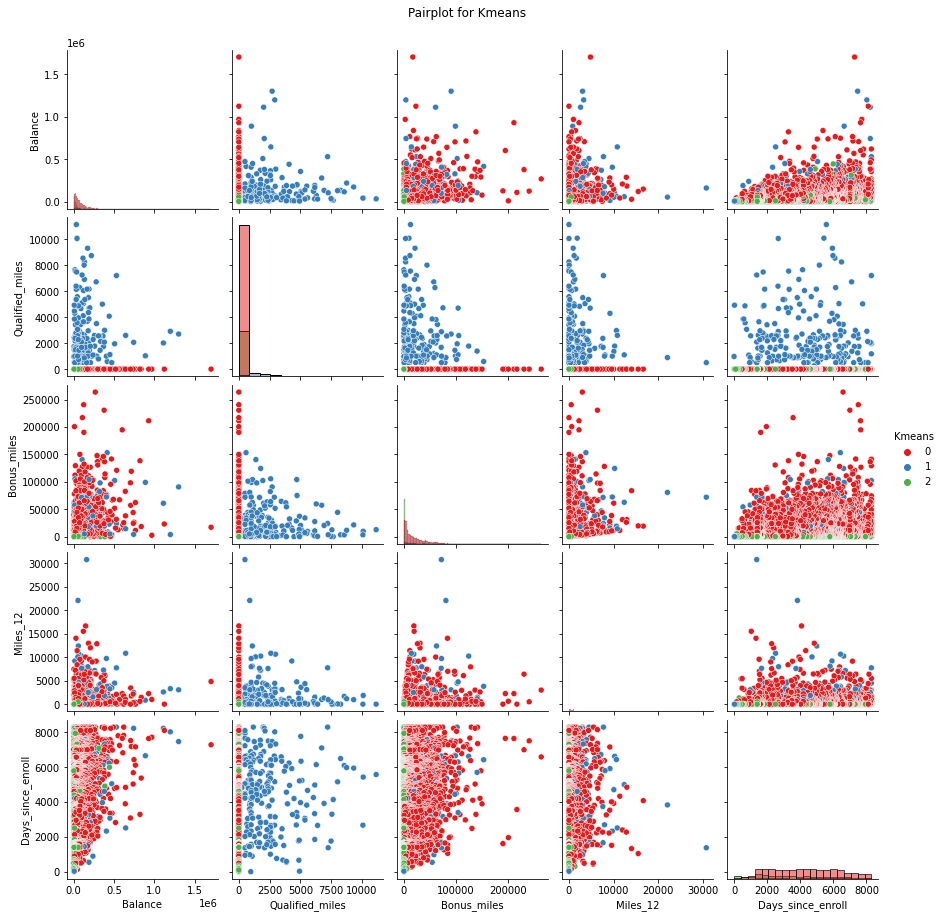

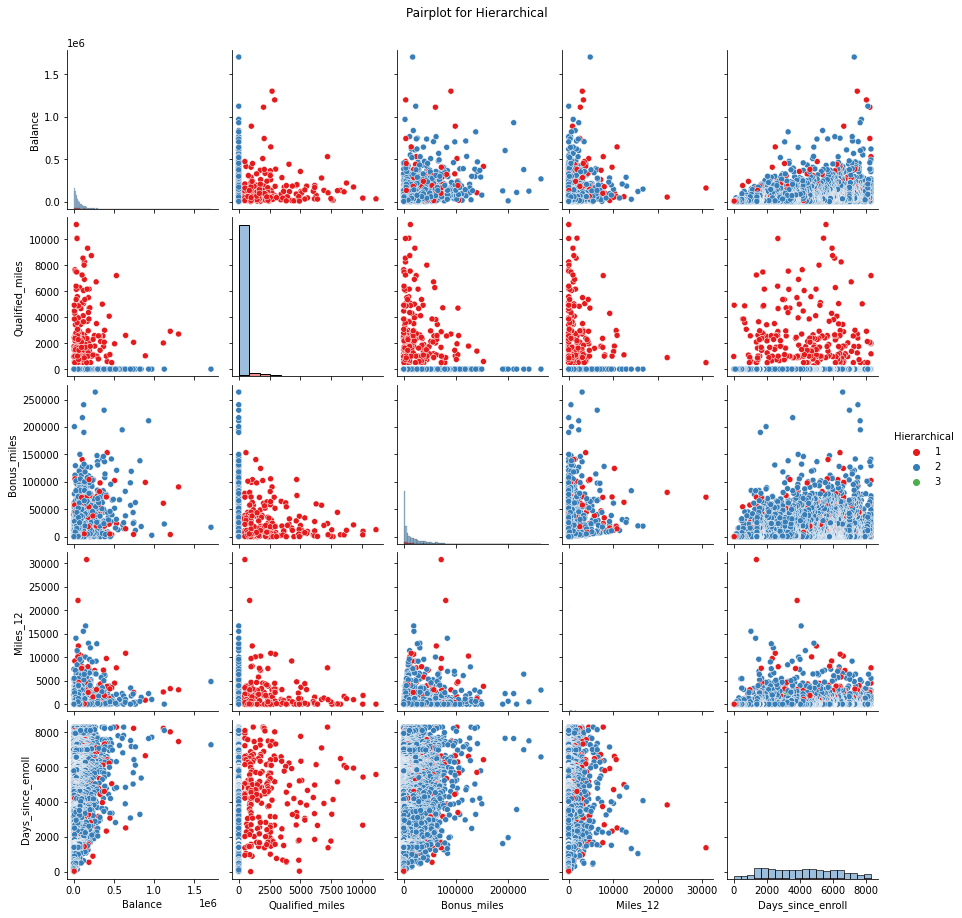

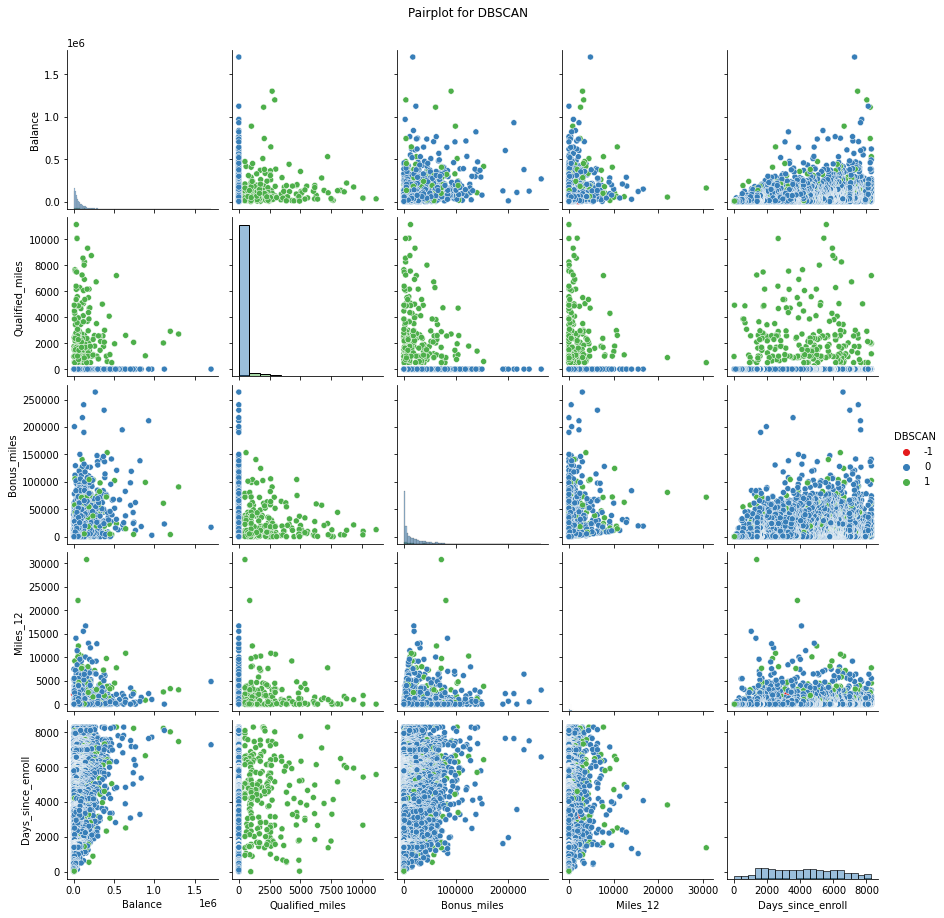

In [197]:
# Select features for the pairplot
features = ['Balance', 'Qualified_miles', 'Bonus_miles', 'Miles_12','Days_since_enroll']

# Create pairplots for each clustering algorithm
for cluster_col in ['Kmeans', 'Hierarchical', 'DBSCAN']:
    g = sns.pairplot(airlines, vars=features, hue=cluster_col, palette='Set1',diag_kind='hist')
    g.fig.suptitle(f'Pairplot for {cluster_col}', y=1.02)
    plt.show()

In [239]:
award = pd.DataFrame({'Award':airlines['Award'], 'Target':airlines['DBSCAN']})

counts = award.value_counts().reset_index(name='Count')

counts['Percent'] = (counts['Count']/counts['Count'].sum()) *100

<Axes: xlabel='Award', ylabel='Percent'>

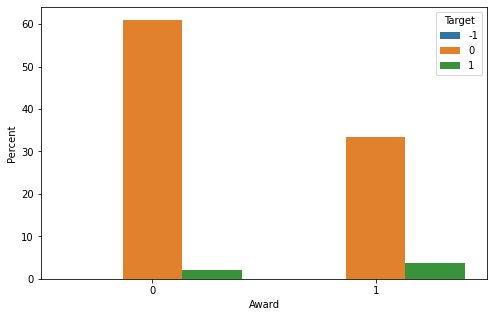

In [242]:
plt.figure(figsize=(8,5))
sns.barplot(x='Award', y='Percent', hue='Target', data=counts)

In [243]:
counts

,Award,Target,Count,Percent
0,0,0,2438,60.965241
1,1,0,1334,33.358340
2,1,1,146,3.650913
3,0,1,80,2.000500
4,1,-1,1,0.025006


1. Cluster -1 (Outlier)
- Contains only 1 data point.
- This is an outlier detected by DBSCAN.
2. Cluster 0 (Majority Group)
- 3,772 data points (majority of the dataset).
- Balance: Average 70,058 miles.
- Bonus miles: Lower than Cluster 1.
- Days since enrollment: Median 5,779 days.
- Award: 35% of users received an award.
- Fewer transactions and miles usage compared to Cluster 1.
3. Cluster 1 (High Mileage Users)
- 226 data points (smaller group).
- Balance: Much higher, around 133,049 miles (almost double Cluster 0).
- Bonus miles: Significantly higher.
- Days since enrollment: Slightly longer than Cluster 0.
- Award: 64% of users received an award.
- More transactions and miles usage, indicating a loyal customer group.


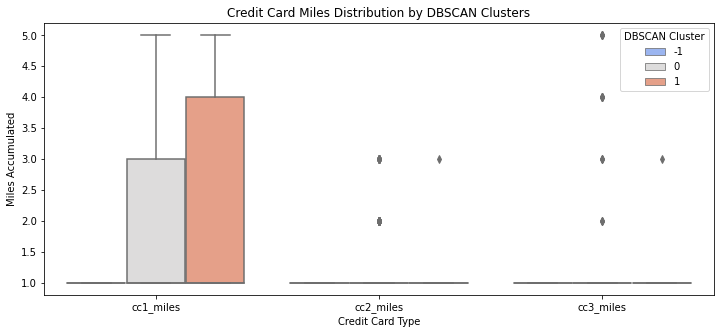

In [216]:

# Set figure size
plt.figure(figsize=(12, 5))

# Melt data for visualization
cc_melted = airlines.melt(id_vars=["DBSCAN"], value_vars=["cc1_miles", "cc2_miles", "cc3_miles"], 
                     var_name="Credit Card", value_name="Miles")

# Boxplot to compare distributions across clusters
sns.boxplot(data=cc_melted, x="Credit Card", y="Miles", hue="DBSCAN", palette="coolwarm")

# Title and labels
plt.title("Credit Card Miles Distribution by DBSCAN Clusters")
plt.xlabel("Credit Card Type")
plt.ylabel("Miles Accumulated")
plt.legend(title="DBSCAN Cluster")
plt.show()


Conclusion:
- Cluster 0 represents the general customer base with moderate balances and awards.
- Cluster 1 represents high-value frequent flyers with significantly higher balances and transactions.